## Q2.1

T [[0.15 0.05 0.   0.   0.   0.   0.   0.8 ]
 [0.8  0.15 0.05 0.   0.   0.   0.   0.  ]
 [0.   0.8  0.15 0.05 0.   0.   0.   0.  ]
 [0.   0.   0.8  0.15 0.05 0.   0.   0.  ]
 [0.   0.   0.   0.8  0.15 0.05 0.   0.  ]
 [0.   0.   0.   0.   0.8  0.15 0.05 0.  ]
 [0.   0.   0.   0.   0.   0.8  0.15 0.05]
 [0.05 0.   0.   0.   0.   0.   0.8  0.15]]


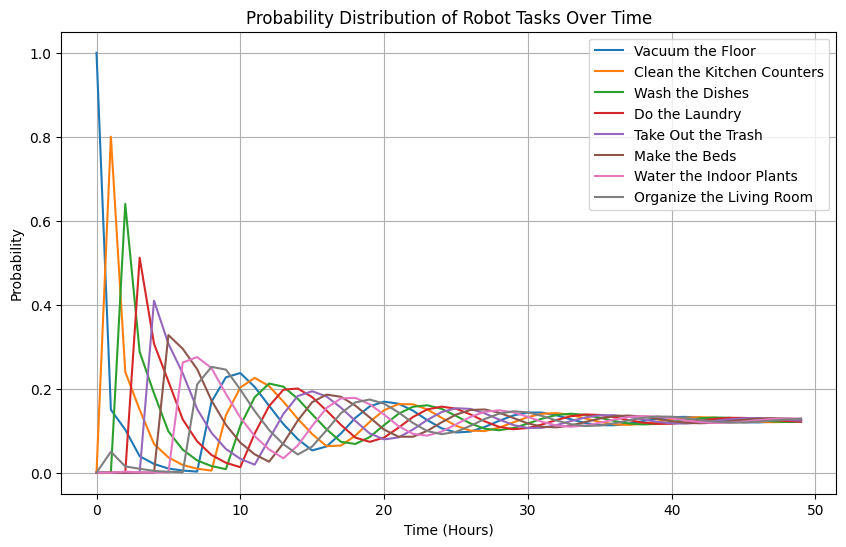

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the probabilities
p_s = 0.15  # stay
p_f = 0.8   # move forward
p_b = 0.05  # move backward

# transition matrix, T
T = np.zeros((8, 8))
np.fill_diagonal(T, p_s)
np.fill_diagonal(T[1:], p_f, wrap=False)
np.fill_diagonal(T[:, 1:], p_b, wrap=False)
T[0, -1] = p_f
T[-1, 0] = p_b
print("T",T)

x = np.array([1, 0, 0, 0, 0, 0, 0, 0])

# states over time (for plot)
states = np.zeros((50, 8))
states[0, :] = x

# 50 time steps
for t in range(1, 50):
    x = np.dot(T, x)
    states[t, :] = x
    # print(x)

plt.figure(figsize=(10, 6))
tasks = [
    "Vacuum the Floor", "Clean the Kitchen Counters", "Wash the Dishes",
    "Do the Laundry", "Take Out the Trash", "Make the Beds",
    "Water the Indoor Plants", "Organize the Living Room"
]
for i in range(8):
    plt.plot(states[:, i], label=tasks[i])

plt.title('Probability Distribution of Robot Tasks Over Time')
plt.xlabel('Time (Hours)')
plt.ylabel('Probability')
plt.legend()
plt.grid(True)
plt.show()


## Q2.2

In [19]:
import numpy.linalg as la

# Compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = la.eig(T)
index = np.argmin(np.abs(eigenvalues - 1)) #locate index of eigenvalue

pi = np.real(eigenvectors[:, index]) # get eigen vector
pi_normalized = pi / np.sum(pi) #normalize

print("Eigenvector",pi_normalized)
print("It's the converging value for the part (1)")


Eigenvector [0.125 0.125 0.125 0.125 0.125 0.125 0.125 0.125]
It's the converging value for the part (1)


## Q2.3

In [17]:
p_m=0.95
# Measurement matrix for "saw robot taking out the trash"
Z_saw_task_specific = np.eye(8) * (1 - p_m) 
Z_saw_task_specific[4, 4] = p_m  

# Measurement matrix for "did not see robot taking out the trash"
Z_not_saw_task_specific = np.eye(8) * p_m 
Z_not_saw_task_specific[4, 4] = 1 - p_m 

print("(1)",Z_saw_task_specific)
print("(2)",Z_not_saw_task_specific)

(1) [[0.05 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.05 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.05 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.05 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.95 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.05 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.05 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.05]]
(2) [[0.95 0.   0.   0.   0.   0.   0.   0.  ]
 [0.   0.95 0.   0.   0.   0.   0.   0.  ]
 [0.   0.   0.95 0.   0.   0.   0.   0.  ]
 [0.   0.   0.   0.95 0.   0.   0.   0.  ]
 [0.   0.   0.   0.   0.05 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.95 0.   0.  ]
 [0.   0.   0.   0.   0.   0.   0.95 0.  ]
 [0.   0.   0.   0.   0.   0.   0.   0.95]]


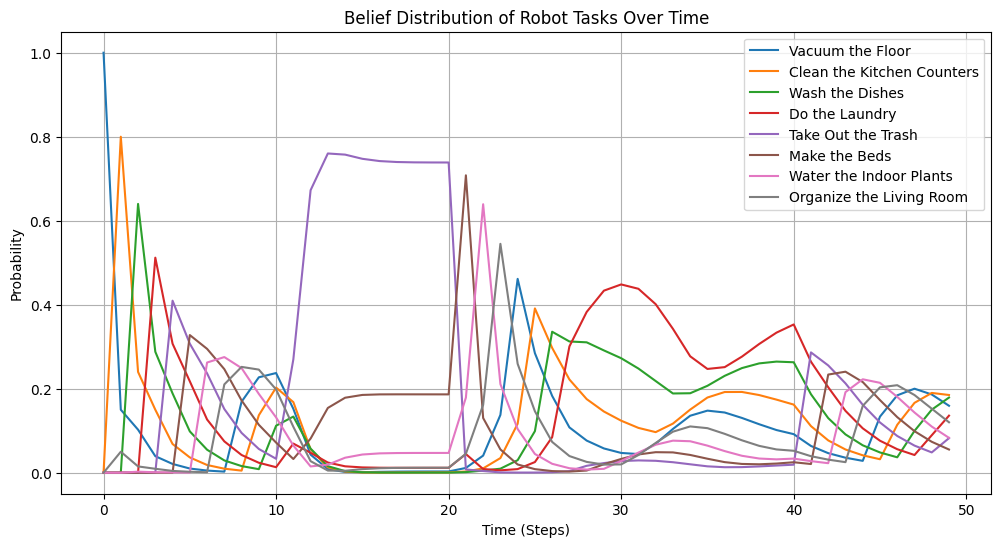

In [5]:
# Initialize the state distribution with certainty that the robot starts with vacuuming
belief = np.zeros(8)
belief[0] = 1  # Robot starts vacuuming with certainty

beliefs_over_time = np.zeros((50, 8))
beliefs_over_time[0, :] = belief

# for all the time pts
for t in range(1, 50):
    if t <= 10:
        # First 10 steps: No measurements, just propagate
        belief = np.dot(T, belief)
    elif 10 < t <= 20:
        # Next 10 steps: Measurements of seeing the robot take out the trash
        belief = np.dot(T, belief) 
        belief = np.dot(Z_saw_task_specific, belief) 
        belief /= np.sum(belief) 
    elif 20 < t <= 40:
        # Next 20 steps: Measurements of not seeing the robot take out the trash
        belief = np.dot(T, belief)  
        belief = np.dot(Z_not_saw_task_specific, belief) 
        belief /= np.sum(belief)  
    else:
        # Last 10 steps: No further measurements, just propagate
        belief = np.dot(T, belief)
    
    beliefs_over_time[t, :] = belief

plt.figure(figsize=(12, 6))
for i in range(8):
    plt.plot(beliefs_over_time[:, i], label=tasks[i])

plt.title('Belief Distribution of Robot Tasks Over Time')
plt.xlabel('Time (Steps)')
plt.ylabel('Probability')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()


In [10]:
beliefs_over_time.shape

(50, 8)

## Q2.5

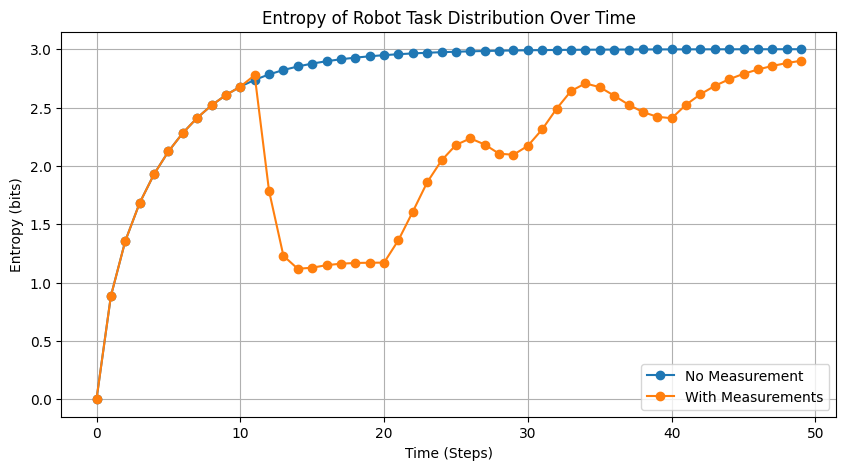

In [15]:
import numpy as np

# Function to compute entropy of a prob dist
def compute_entropy(distribution):
    distribution = np.where(distribution == 0, np.finfo(float).eps, distribution)
    return -np.sum(distribution * np.log2(distribution))

initial_belief = np.zeros(8)
initial_belief[0] = 1  # Robot starts vacuuming with certainty

# Place holder for plot
no_meas_beliefs = np.zeros((50, 8))
no_meas_beliefs[0, :] = initial_belief

for t in range(1, 50):
    no_meas_beliefs[t, :] = np.dot(T, no_meas_beliefs[t-1])

no_meas_entropy = [compute_entropy(belief) for belief in no_meas_beliefs] # entropy for the no-measurement case
full_scenario_entropy = [compute_entropy(belief) for belief in beliefs_over_time] # with measurement

# Plotting the entropies
plt.figure(figsize=(10, 5))
plt.plot(range(50), no_meas_entropy, label='No Measurement', marker='o')
plt.plot(range(50), full_scenario_entropy, label='With Measurements', marker='o')
plt.title('Entropy of Robot Task Distribution Over Time')
plt.xlabel('Time (Steps)')
plt.ylabel('Entropy (bits)')
plt.legend()
plt.grid(True)
plt.show()
